In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [4]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
model = LogisticRegression(solver='liblinear',random_state=0).fit(x,y)

In [10]:
model.classes_

array([0, 1])

In [11]:
print(model.intercept_,model.coef_)

[-1.04608067] [[0.51491375]]


In [12]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model.score(x,y)

0.9

In [15]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

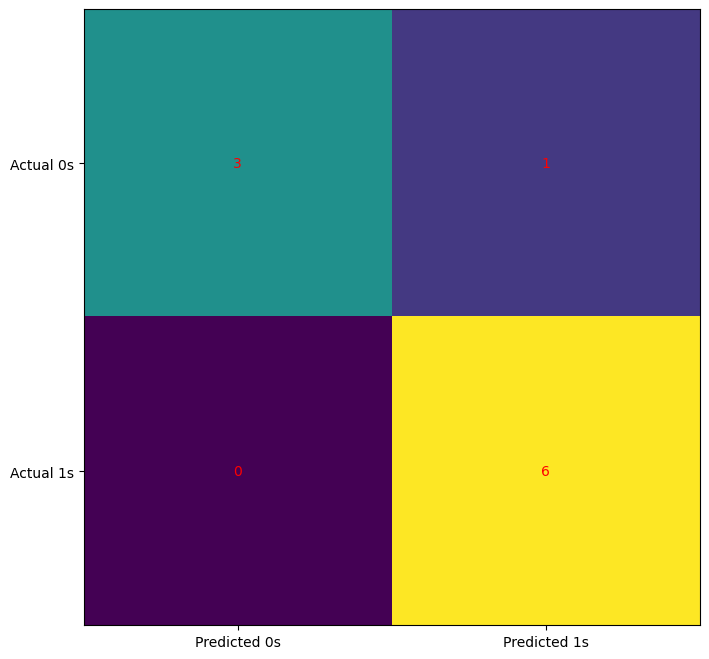

In [19]:
cm = confusion_matrix(y, model.predict(x))
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',color='red')
plt.show()

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [21]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [23]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [24]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [25]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [26]:
model.score(x,y)

1.0

In [27]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [28]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
x,y = load_digits(return_X_y=True)

In [31]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2, random_state=0)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [35]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [36]:
x_test = scaler.transform(x_test)

In [37]:
y_pred = model.predict(x_test)

In [38]:
model.score(x_train, y_train)

0.9749303621169917

In [39]:
model.score(x_test, y_test)

0.9235048678720446

In [40]:
confusion_matrix(y_test, y_pred)

array([[145,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 133,   5,   1,   1,   0,   1,   0,   0,   6],
       [  1,   0, 135,   0,   1,   0,   0,   1,   0,   0],
       [  0,   2,   3, 132,   0,   3,   0,   4,   4,   2],
       [  0,   0,   0,   0, 131,   0,   0,   2,   0,   4],
       [  1,   0,   0,   0,   0, 145,   1,   1,   0,   5],
       [  1,   2,   0,   0,   1,   0, 137,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 139,   0,   0],
       [  0,   8,   2,   2,   0,   7,   6,   1, 101,  19],
       [  1,   0,   0,   2,   0,   4,   0,   2,   0, 130]], dtype=int64)

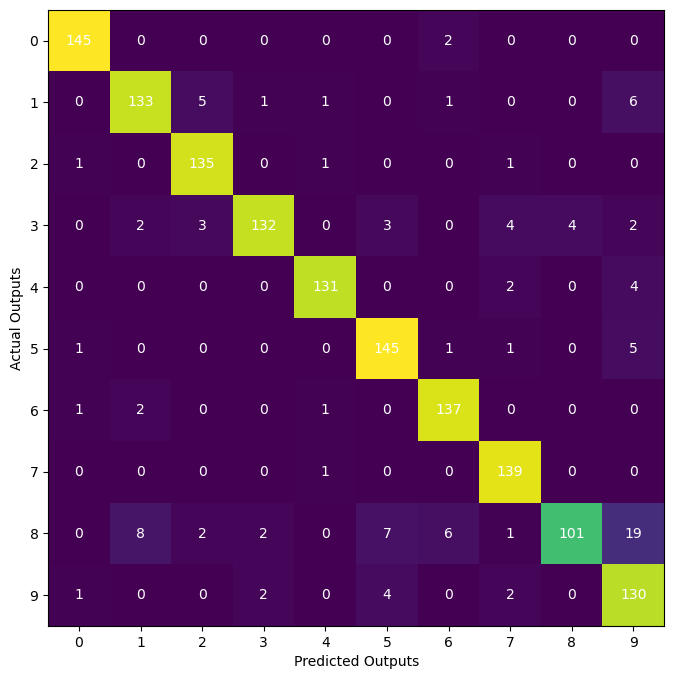

In [41]:
cm = confusion_matrix(y_test, y_pred)

fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='white')
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.92      0.90      0.91       147
           2       0.93      0.98      0.95       138
           3       0.96      0.88      0.92       150
           4       0.97      0.96      0.96       137
           5       0.91      0.95      0.93       153
           6       0.93      0.97      0.95       141
           7       0.93      0.99      0.96       140
           8       0.96      0.69      0.80       146
           9       0.78      0.94      0.85       139

    accuracy                           0.92      1438
   macro avg       0.93      0.92      0.92      1438
weighted avg       0.93      0.92      0.92      1438



In [43]:
weather = [
    'Sunny', 'Sunny',
    'Overcast', 'Rainy',
    'Rainy', 'Rainy',
    'Overcast', 'Sunny',
    'Sunny', 'Rainy',
    'Sunny', 'Overcast',
    'Overcast', 'Rainy'
]

# Second Feature
temp = [
    'Hot', 'Hot',
    'Hot', 'Mild',
    'Cool', 'Cool',
    'Cool', 'Mild',
    'Cool', 'Mild',
    'Mild', 'Mild',
    'Hot', 'Mild'
]

# Label or Target Variable
play = [
    'No', 'No',
    'Yes', 'Yes',
    'Yes', 'No',
    'Yes', 'No',
    'Yes', 'Yes',
    'Yes', 'Yes',
    'Yes', 'No'
]

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder() # bikin instance labelencoder

In [47]:
# Converting string into numbers
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

# mendapatkan mapping hasil encode
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(weather_mapping)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
{'Overcast': 0, 'Rainy': 1, 'Sunny': 2}


In [48]:
# Converting string into numbers
temp_encoded = le.fit_transform(temp)
print(temp_encoded)

# mendapatkan mapping hasil encode
temp_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(temp_mapping)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
{'Cool': 0, 'Hot': 1, 'Mild': 2}


In [49]:
# Converting string labels into numbers
label = le.fit_transform(play)
print(label)

# mendapatkan mapping hasil encode
play_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(play_mapping)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'No': 0, 'Yes': 1}


In [50]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [51]:
# Import package
from sklearn.neighbors import KNeighborsClassifier

# Create Model
model = KNeighborsClassifier(n_neighbors = 3)

# Train model
model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [52]:
# Predict Output
# 0: Overcast, 2: Mild
predicted = model.predict([[0,2]])

print(predicted)

[1]


In [53]:
from sklearn import datasets

# Load dataset
wine = datasets.load_wine()
# print the names of features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [54]:
# print the labels
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [55]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [56]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [57]:
print(wine.data.shape)

(178, 13)


In [58]:
print(wine.target.shape)

(178,)


In [59]:
from sklearn.model_selection import train_test_split

# split into train set dan test set
# Train 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.3, random_state=5)

In [60]:
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Train model using Train Sets
knn_5.fit(X_train, y_train)

# Predict Output
y_pred = knn_5.predict(X_test)

print(y_pred)

[0 1 0 0 1 1 0 2 0 0 0 0 2 2 2 0 1 1 2 2 0 0 0 1 1 1 0 1 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 1 0 1 0 1 2 0]


In [61]:
# import library for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7037037037037037


In [62]:
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train model using Train Sets
knn_7.fit(X_train, y_train)

# Predict Output
y_pred = knn_7.predict(X_test)

print(y_pred)

[0 1 0 0 2 1 0 2 0 0 2 0 2 1 2 0 1 2 2 2 0 0 0 1 1 1 0 2 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 2 0 1 0 1 2 0]


In [63]:
# import library for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7592592592592593


In [64]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_pred))

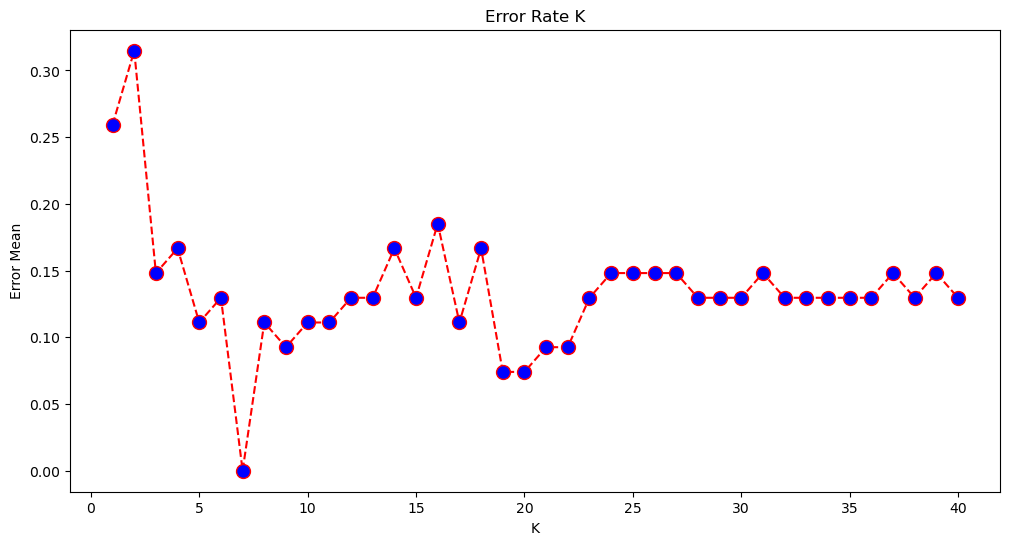

In [65]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 41),
         error,
         color='red',
         linestyle='dashed',
         marker='o',
         markerfacecolor='blue',
         markersize=10
        )

plt.title("Error Rate K")
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

In [66]:
# Import Package
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier, with k=5
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train model using Train Sets
knn_7.fit(X_train, y_train)

# Predict Output
y_pred = knn_7.predict(X_test)

print(y_pred)

[0 1 0 0 2 1 0 2 0 0 2 0 2 1 2 0 1 2 2 2 0 0 0 1 1 1 0 2 2 0 1 2 0 0 2 0 0
 2 2 2 1 1 2 0 1 1 0 2 0 1 0 1 2 0]


In [67]:
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))


Accuracy : 0.7592592592592593
